<a href="https://colab.research.google.com/github/aidulfitri/module3/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tabulate
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'nabilambangkit'
os.environ['KAGGLE_KEY'] = '3424b51719aff67d21ab4d54441ffa15'

In [ ]:
!kaggle datasets download -d aprabowo/indonesia-tourism-destination -f tourism_with_id.csv -p .
!kaggle datasets download -d aprabowo/indonesia-tourism-destination -f tourism_rating.csv -p .

Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
  0% 0.00/357k [00:00<?, ?B/s]
100% 357k/357k [00:00<00:00, 109MB/s]
Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
  0% 0.00/102k [00:00<?, ?B/s]
100% 102k/102k [00:00<00:00, 66.4MB/s]


In [ ]:
tourism_df = pd.read_csv('tourism_with_id.csv')
rating_df = pd.read_csv('tourism_rating.csv')

In [ ]:
data_place = tourism_df[["Place_Id", "Place_Name", "Category", "Rating"]]
rating_df = rating_df[["User_Id",	"Place_Id", "Place_Ratings"]]

In [ ]:
num_cat = len(data_place["Category"].unique())
num_user = len(rating_df["User_Id"].unique())

In [ ]:
def gen_user_vecs(user_vecs, num):
  vec = []

  for i in range(num):
    vec.append(user_vecs)

  return np.array(vec)

In [ ]:
place_prep = rating_df.copy()
place_prep = place_prep.drop("User_Id", axis=1)
place_prep = place_prep.groupby(['Place_Id']).count()
place_prep = place_prep.reset_index()


place_rating = {'Place_Id': data_place["Place_Id"].unique()}
place_rating = pd.DataFrame(place_rating)
cols_name = data_place["Category"].unique()

for i in range(num_cat):
  place_rating.insert(i+1, cols_name[i], np.zeros(len(data_place["Place_Id"].unique())), True)

for i in range(len(data_place)):
  place_rating[data_place["Category"][i]][i] = 1

place_rating.insert(7, "Rating", data_place["Rating"], True)
place_rating.insert(8, "Rating_Count", place_prep["Place_Ratings"], True)

place_rating


<ipython-input-12-cff9c66c6baa>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place_rating[data_place["Category"][i]][i] = 1
<ipython-input-12-cff9c66c6baa>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place_rating[data_place["Category"][i]][i] = 1
<ipython-input-12-cff9c66c6baa>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  place_rating[data_place["Category"][i]][i] = 1
<ipython-input-12-cff9c66c6baa>:15: SettingWithCopyW

,Place_Id,Budaya,Taman Hiburan,Cagar Alam,Bahari,Pusat Perbelanjaan,Tempat Ibadah,Rating,Rating_Count
0,1,1.0,0.0,0.0,0.0,0.0,0.0,4.6,18
1,2,1.0,0.0,0.0,0.0,0.0,0.0,4.6,25
2,3,0.0,1.0,0.0,0.0,0.0,0.0,4.6,19
3,4,0.0,1.0,0.0,0.0,0.0,0.0,4.5,21
4,5,0.0,1.0,0.0,0.0,0.0,0.0,4.5,25
...,...,...,...,...,...,...,...,...,...
432,433,1.0,0.0,0.0,0.0,0.0,0.0,4.4,23
433,434,0.0,1.0,0.0,0.0,0.0,0.0,4.6,25
434,435,0.0,1.0,0.0,0.0,0.0,0.0,4.4,17
435,436,0.0,1.0,0.0,0.0,0.0,0.0,4.6,22


In [ ]:
user_prep = pd.merge(rating_df, data_place)
user_prep = user_prep.drop(["Rating", "Place_Id"], axis=1)
user_prep = user_prep.groupby(['User_Id', 'Category']).nunique()  # Apply an aggregation (e.g., mean)
user_prep = user_prep.reset_index()
user_prep

,User_Id,Category,Place_Ratings,Place_Name
0,1,Bahari,1,2
1,1,Budaya,4,12
2,1,Cagar Alam,4,8
3,1,Pusat Perbelanjaan,1,1
4,1,Taman Hiburan,4,5
...,...,...,...,...
1625,300,Bahari,2,3
1626,300,Budaya,5,8
1627,300,Cagar Alam,4,5
1628,300,Taman Hiburan,4,7


In [ ]:
user_prep = pd.merge(rating_df, data_place)
user_prep = user_prep.drop(["Rating", "Place_Id"], axis=1)
user_prep = user_prep.groupby(['User_Id', 'Category']).nunique()
user_prep = user_prep.reset_index()

user_rating = {'User_Id': rating_df["User_Id"].unique()}
user_rating = pd.DataFrame(user_rating)
col_name = data_place["Category"].unique()

for i in range(num_cat):
  user_rating.insert(i+1, col_name[i], np.array([3.0]*num_user), True)

for i in range(len(user_prep)):
  user_rating[user_prep["Category"][i]][user_prep["User_Id"][i]-1] = user_prep["Place_Ratings"][i].copy()

user_rating

Streaming output truncated to the last 5000 lines.
<ipython-input-34-293a8404c0bc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rating[user_prep["Category"][i]][user_prep["User_Id"][i]-1] = user_prep["Place_Ratings"][i].copy()
<ipython-input-34-293a8404c0bc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rating[user_prep["Category"][i]][user_prep["User_Id"][i]-1] = user_prep["Place_Ratings"][i].copy()
<ipython-input-34-293a8404c0bc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,User_Id,Budaya,Taman Hiburan,Cagar Alam,Bahari,Pusat Perbelanjaan,Tempat Ibadah
0,1,4.0,4.0,4.0,1.0,1.0,1.0
1,2,4.0,4.0,4.0,1.0,3.0,3.0
2,3,4.0,4.0,3.0,2.0,3.0,1.0
3,4,3.0,4.0,3.0,1.0,1.0,3.0
4,5,2.0,4.0,3.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...
295,296,5.0,4.0,4.0,2.0,1.0,2.0
296,297,5.0,3.0,3.0,4.0,1.0,2.0
297,298,3.0,4.0,5.0,3.0,1.0,2.0
298,299,5.0,5.0,2.0,2.0,2.0,1.0


In [ ]:
place_ratings = rating_df.merge(place_rating, how="left", on="Place_Id")
place_ratings = place_ratings.drop(["User_Id", "Place_Id", "Place_Ratings"], axis=1)

user_ratings = rating_df.merge(user_rating, how="left", on="User_Id")
user_ratings = user_ratings.drop(["User_Id", "Place_Id", "Place_Ratings"], axis=1)

y = np.array(rating_df["Place_Ratings"])


In [ ]:
# Place
place_train = place_ratings.copy()
place_train["Rating"] = (place_train["Rating"]-3)/2
place_train["Rating_Count"] = (place_train["Rating_Count"])/50

# User
user_train = user_ratings.copy()
user_train = (user_train-3)/2


# Target
y_train = y.copy()
y_train = (y_train-3)/2


In [ ]:

place_train, place_test = train_test_split(place_train, train_size=0.80, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
print(f"place training data shape: {user_train.shape}")
print(f"place test data shape: {user_test.shape}")

place training data shape: (8000, 6)
place test data shape: (2000, 6)


In [ ]:
num_outputs = 8



tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='linear'),
    tf.keras.layers.Dense(num_outputs, activation='linear')
])

item_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='linear'),
    tf.keras.layers.Dense(num_outputs, activation='linear')
])

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_cat))
vu = user_NN(input_user)


# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_cat+2))
vm = item_NN(input_item)



# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, 8)                    248       ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 8)                    280       ['input_2[0][0]']             
                                                                                              

In [ ]:

tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=cost_fn,
              metrics=[tf.keras.metrics.CosineSimilarity(axis=1)]
              )
history = model.fit([user_train, place_train], y_train, validation_split=0.2, epochs=20)

Epoch 1/20
200/200 [==============================] - 4s 7ms/step - loss: 0.4980 - cosine_similarity: 0.0125 - val_loss: 0.4755 - val_cosine_similarity: 0.0100
Epoch 2/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4836 - cosine_similarity: 0.0156 - val_loss: 0.4714 - val_cosine_similarity: 0.0475
Epoch 3/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4831 - cosine_similarity: 0.0247 - val_loss: 0.4730 - val_cosine_similarity: 0.0150
Epoch 4/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4822 - cosine_similarity: 0.0406 - val_loss: 0.4740 - val_cosine_similarity: -0.0013
Epoch 5/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4811 - cosine_similarity: 0.0372 - val_loss: 0.4689 - val_cosine_similarity: 0.0338
Epoch 6/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4797 - cosine_similarity: 0.0456 - val_loss: 0.4722 - val_cosine_similarity: -0.0012
Epoch 7/20
200/200 [==================

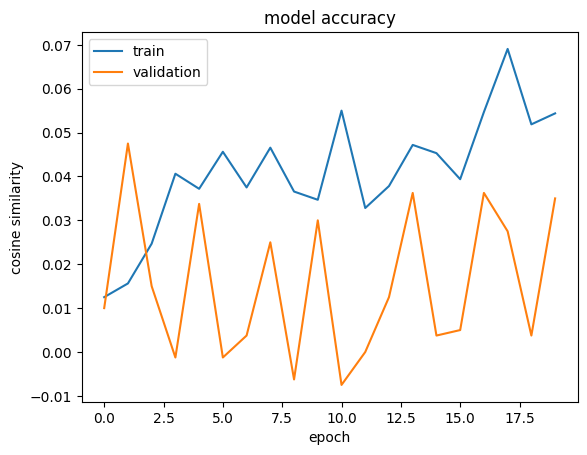

In [ ]:
plt.plot(history.history['cosine_similarity'])
plt.plot(history.history['val_cosine_similarity'])
plt.title('model accuracy')
plt.ylabel('cosine similarity')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


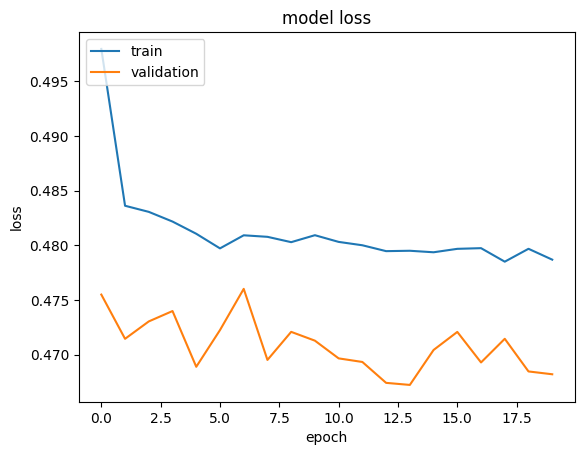

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate([user_test, place_test], y_test)

63/63 [==============================] - 1s 5ms/step - loss: 0.4712 - cosine_similarity: 0.0020


[0.4711562395095825, 0.0020000010263174772]

In [ ]:
rate_Budaya = 5
rate_Taman_Hiburan = 3
rate_Cagar_Alam = 3
rate_Bahari = 3
rate_Pusat_Perbelanjaan	= 3
rate_Tempat_Ibadah = 3

user_vec = [rate_Budaya, rate_Taman_Hiburan, rate_Cagar_Alam,
                      rate_Bahari, rate_Pusat_Perbelanjaan, rate_Tempat_Ibadah]

# generate and replicate the user vector to match the number movies in the data set.
user_vecs = np.array(gen_user_vecs(user_vec,len(place_rating)))
item_vecs = place_rating.drop("Place_Id", axis=1).copy()



# scale our user and item vectors
suser_vecs = (user_vecs-3)/2
sitem_vecs = item_vecs.copy()
sitem_vecs["Rating"] = (sitem_vecs["Rating"]-3)/2
sitem_vecs["Rating_Count"] = (sitem_vecs["Rating_Count"])/50

# make a prediction
y_p = model.predict([suser_vecs, sitem_vecs])

# unscale y prediction
y_pu = y_p*2+3
sorted_index = np.argsort((-y_pu),axis=0).reshape(-1).tolist() #negate to get largest rating first
sorted_ypu   = y_pu[sorted_index]
sorted_items = data_place.copy()
sorted_items = sorted_items.loc[sorted_index,:]  #using unscaled vectors for display
sorted_items.insert(4, "yp", sorted_ypu.flatten())
sorted_items.set_index("Place_Id").head(20)

14/14 [==============================] - 0s 3ms/step


,Place_Name,Category,Rating,yp
Place_Id,,,,
124,Kauman Pakualaman Yogyakarta,Budaya,5.0,3.307528
412,Masjid Nasional Al-Akbar,Tempat Ibadah,4.9,3.280354
175,Museum Ullen Sentalu,Budaya,4.7,3.279849
278,Masjid Daarut Tauhiid Bandung,Tempat Ibadah,4.9,3.260666
212,Jalan Braga,Budaya,4.7,3.260160
288,Masjid Salman ITB,Tempat Ibadah,4.8,3.254721
380,Masjid Agung Ungaran,Tempat Ibadah,4.7,3.253698
69,Freedom Library,Budaya,5.0,3.248462
63,Museum Kebangkitan Nasional,Budaya,4.7,3.245394
